In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import Landing2DModel
import Landing2DCost
import Landing2DConstraints
from scipy.integrate import solve_ivp
from Scvx import Scvx

In [38]:
ix = 6
iu = 2
ih = 9
N = 50
delT = 0.1
max_iter = 30

In [46]:
xi = np.array([4,4,0,0,0,0])
xf = np.array([0,0,0,0,0,0])


myModel = Landing2DModel.Landing2D('Hello',ix,iu,delT)
myCost = Landing2DCost.Landing2D('Hello',ix,iu,N)
myConst = Landing2DConstraints.Landing2D('Hello',ix,iu,ih)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N,iu))
# u0[:,0] = 0
u0[:,1] = 0

In [47]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst,tol_bc=1e-3)
x,u,xbar,ubar = i1.update(x0,u0)

NameError: name 'x_bar' is not defined

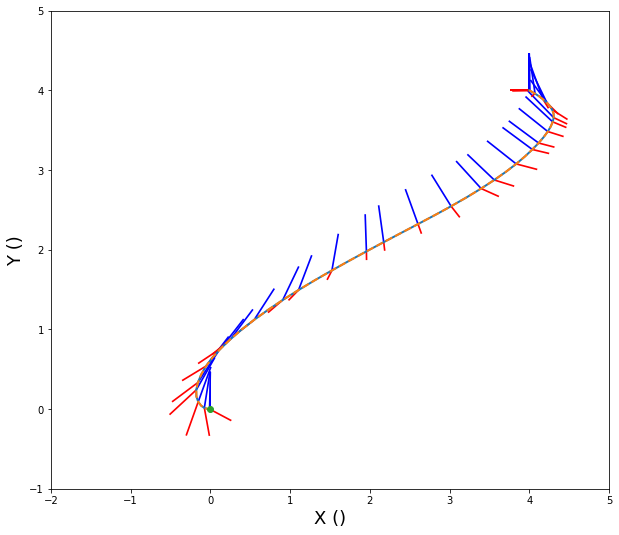

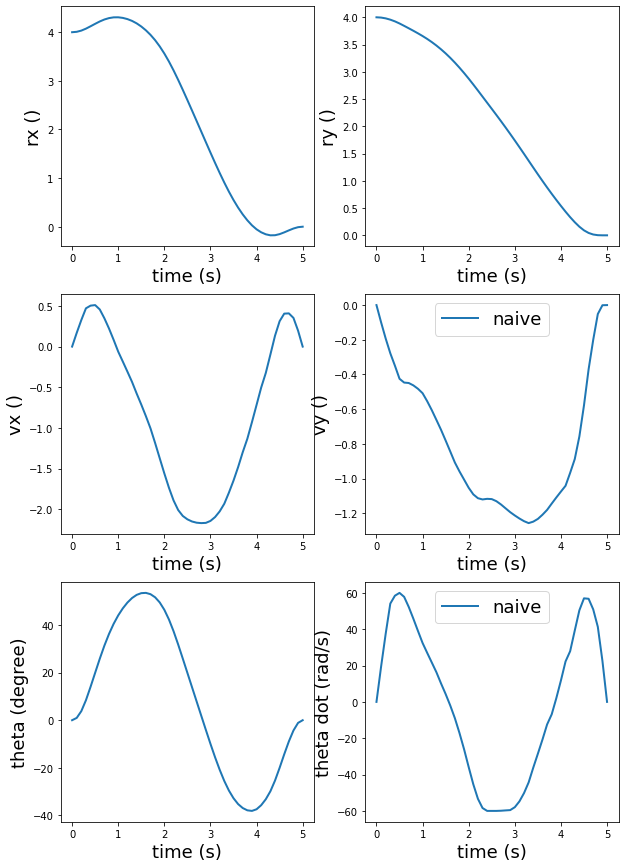

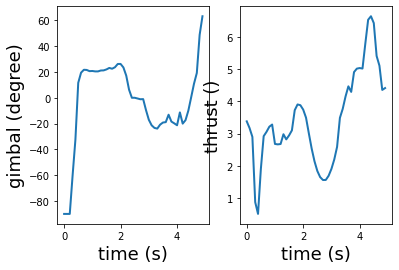

In [48]:
def plot_Landing2D_trajectory (x,u,xppg) :
    fS = 18
    Fx = +np.sin(x[:N,4] + u[:,0]) * u[:,1]
    Fy = -np.cos(x[:N,4] + u[:,0]) * u[:,1]
    plt.figure(1,figsize=(10,10))
    plt.plot(x[:,0], x[:,1], linewidth=2.0)
    plt.plot(xppg[:,0], xppg[:,1], '--',linewidth=2.0)
    plt.plot(0,0,'o')
    plt.gca().set_aspect('equal', adjustable='box')
    index = np.linspace(0,N-1,30)
    index = [int(i) for i in index]
    plt.quiver(x[index,0], x[index,1], -np.sin(x[index,4]), np.cos(x[index,4]), color='blue', width=0.003, scale=15, headwidth=1, headlength=0)
    plt.quiver(x[index,0], x[index,1], Fx[index], Fy[index], color='red', width=0.003, scale=100, headwidth=1, headlength=0)
    plt.quiver(x[N,0], x[N,1], -np.sin(x[N,4]), np.cos(x[N,4]), color='blue', width=0.003, scale=15, headwidth=1, headlength=0)
    plt.axis([-2, 5, -1, 5])
    plt.xlabel('X ()', fontsize = fS)
    plt.ylabel('Y ()', fontsize = fS)

    plt.figure(2,figsize=(10,15))
    plt.subplot(321)
    plt.plot(np.array(range(N+1))*delT, x[:,0], linewidth=2.0,label='naive')
    plt.xlabel('time (s)', fontsize = fS)
    plt.ylabel('rx ()', fontsize = fS)
    plt.subplot(322)
    plt.plot(np.array(range(N+1))*delT, x[:,1], linewidth=2.0,label='naive')
    plt.xlabel('time (s)', fontsize = fS)
    plt.ylabel('ry ()', fontsize = fS)
    plt.subplot(323)
    plt.plot(np.array(range(N+1))*delT, x[:,2], linewidth=2.0,label='naive')
    plt.xlabel('time (s)', fontsize = fS)
    plt.ylabel('vx ()', fontsize = fS)
    plt.subplot(324)
    plt.plot(np.array(range(N+1))*delT, x[:,3], linewidth=2.0,label='naive')
    plt.xlabel('time (s)', fontsize = fS)
    plt.ylabel('vy ()', fontsize = fS)
    plt.legend(fontsize=fS)
    plt.subplot(325)
    plt.plot(np.array(range(N+1))*delT, x[:,4]*180/np.pi, linewidth=2.0,label='naive')
    plt.xlabel('time (s)', fontsize = fS)
    plt.ylabel('theta (degree)', fontsize = fS)
    plt.subplot(326)
    plt.plot(np.array(range(N+1))*delT, x[:,5]*180/np.pi, linewidth=2.0,label='naive')
    plt.xlabel('time (s)', fontsize = fS)
    plt.ylabel('theta dot (rad/s)', fontsize = fS)
    plt.legend(fontsize=fS)
    plt.show()
    
    plt.figure(3)
    plt.subplot(121)
    plt.plot(np.array(range(N))*delT, u[:,0]*180/np.pi, linewidth=2.0)
    plt.xlabel('time (s)', fontsize = fS)
    plt.ylabel('gimbal (degree)', fontsize = fS)
    plt.subplot(122)
    plt.plot(np.array(range(N))*delT, u[:,1], linewidth=2.0)
    plt.xlabel('time (s)', fontsize = fS)
    plt.ylabel('thrust ()', fontsize = fS)
    plt.show()
    
plot_Landing2D_trajectory(xbar,ubar,x)


In [10]:
import imageio
import os
def make_trajectory_fig(x,u) :

    Fx = +np.sin(x[:N,4] + u[:,0]) * u[:,1]
    Fy = -np.cos(x[:N,4] + u[:,0]) * u[:,1]
    filenames = []
    for i in range(N+10) :
        fS = 18
        plt.figure(figsize=(10,10))
        plt.gca().set_aspect('equal', adjustable='box')
        if i <= N :
            index = i
        else :
            index = N
        plt.plot(x[:i+1,0], x[:i+1,1], linewidth=2.0) 
        plt.plot(0, 0,'*', linewidth=2.0)
        plt.quiver(x[index,0], x[index,1], -np.sin(x[index,4]), np.cos(x[index,4]), color='blue', width=0.003, scale=15, headwidth=1, headlength=0)
        if i < N :
            plt.quiver(x[index,0], x[index,1], Fx[index], Fy[index], color='red', width=0.003, scale=100, headwidth=1, headlength=0)
        plt.axis([-2, 5, -1, 5])
        plt.xlabel('X ()', fontsize = fS)
        plt.ylabel('Y ()', fontsize = fS)
        filename = '../images/{:d}.png'.format(i)
        plt.savefig(filename)
        filenames.append(filename)
        plt.close()

    with imageio.get_writer('../images/Landing2D.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)

In [11]:
make_trajectory_fig(xbar,ubar)

In [ ]:
# def diff_discrete_zoh(self,x,u) :
#     delT = self.delT
#     ix = self.ix
#     iu = self.iu

#     ndim = np.ndim(x)
#     if ndim == 1: # 1 step state & input
#         N = 1
#         x = np.expand_dims(x,axis=0)
#         u = np.expand_dims(u,axis=0)
#     else :
#         N = np.size(x,axis = 0)

#     def dvdt(V,t,x,u,length) :
#         assert len(x) == length
#         V = V.reshape((length,ix*ix + ix*iu + ix + ix)).transpose()[0:ix*ix]
#         Phi = V.transpose().reshape((length,ix,ix))
#         Phi_inv = np.linalg.inv(Phi)
#         f = self.forward(x,u,discrete=False)
#         A,B = self.diff_numeric(x,u,discrete=False)
#         dpdt = np.matmul(A,Phi).reshape((length,ix*ix)).transpose()
#         dbdt = np.matmul(Phi_inv,B).reshape((length,ix*iu)).transpose()
#         dsdt = np.squeeze(np.matmul(Phi_inv,np.expand_dims(f,2))).transpose()
#         dzdt = np.squeeze(-np.matmul(A,np.expand_dims(x,2)) - np.matmul(B,np.expand_dims(u,2))).transpose()
#         dv = np.vstack((dpdt,dbdt,dsdt,dzdt))
#         return dv.flatten(order='F')

#     A0 = np.eye(ix).flatten()
#     B0 = np.zeros((ix*iu))
#     s0 = np.zeros(ix)
#     z0 = np.zeros(ix)
#     V0 = np.hstack((A0,B0,s0,z0))

#     V0_repeat = np.repeat(np.expand_dims(V0,1),N,1).flatten(order='F')
#     sol = odeint(dvdt,V0_repeat,(0,delT),args=(x[0:N],u[0:N],N))[-1]
#     sol = sol.reshape((N,-1))
#     A = sol[:,0:ix*ix].reshape((-1,ix,ix))
#     B = np.matmul(A,sol[:,ix*ix:ix*ix+ix*iu].reshape((-1,ix,iu)))
#     s = np.matmul(A,sol[:,ix*ix+ix*iu:ix*ix+ix*iu+ix].reshape((-1,ix,1))).squeeze()
#     z = np.matmul(A,sol[:,ix*ix+ix*iu+ix:].reshape((-1,ix,1))).squeeze()

#     return A,B,s,z